In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = mouse_metadata.merge(study_results)

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = merged_df["Mouse ID"].value_counts()
number_of_mice.count() 
mice = number_of_mice.count()
print(f"The total number of mice: {mice}")

The total number of mice: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
number_of_mice 
# Shows Mouse ID, g989 has 13 timepoints. 10 should be the max.

g989    13
w151    10
c559    10
m601    10
w422    10
        ..
b447     1
o848     1
f932     1
u153     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = merged_df.loc[(merged_df["Mouse ID"] == "g989")]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice2 = clean_df["Mouse ID"].value_counts()
number_of_mice2.count() 
mice2 = number_of_mice2.count()
print(f"The total number of mice: {mice2}")

The total number of mice: 248


 # Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
standard_deviation = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_deviation, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.
# Using the aggregation method, produce the same summary statistics in a single line.
clean_df.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


 Bar and Pie Charts

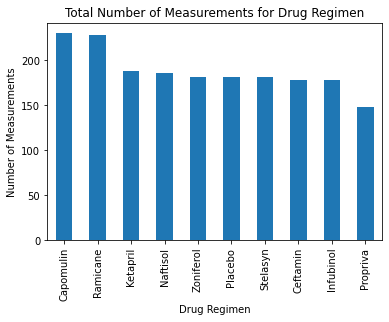

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

measurements = clean_df["Drug Regimen"].value_counts()

drug = (['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 
         'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'])

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

measurements.plot(kind="bar", x=drug, y=measurements, title="Total Number of Measurements for Drug Regimen", figsize=(6,4))
plt.show()

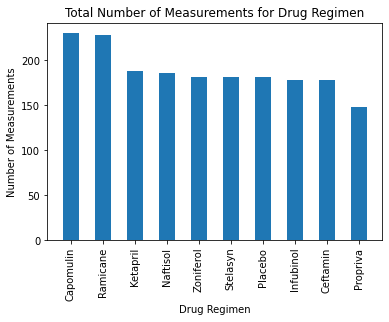

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

measurements2 = clean_df["Drug Regimen"].value_counts()

drug = (['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 
         'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'])

x_axis_data = np.arange(1, 11, 1)

plt.bar(drug, measurements2, width=0.5)

plt.xticks(rotation=90)
plt.title("Total Number of Measurements for Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

plt.show()

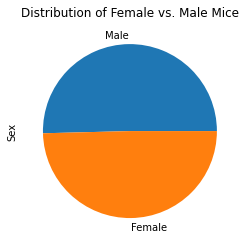

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = clean_df.loc[:, ["Mouse ID", "Sex"]]
gender_df

reduced_gender_df = gender_df.drop_duplicates(subset=['Mouse ID'])
reduced_gender_df

gender_total = reduced_gender_df["Sex"].value_counts()
gender_total

gender_total.plot(kind="pie", title="Distribution of Female vs. Male Mice")

([<matplotlib.patches.Wedge at 0x15793407978>,
 [Text(-0.013934097579311132, 1.0999117423341975, 'Male'),
  Text(0.013934097579310996, -1.0999117423341975, 'Female')])

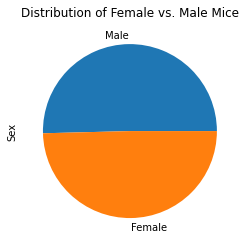

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

count = [125, 123]
Male = 125
Female = 123

plt.ylabel("Sex")
plt.title("Distribution of Female vs. Male Mice")
plt.pie(count, labels=labels, startangle=0)

 # Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest = clean_df.groupby(["Mouse ID"]).max()["Timepoint"]
greatest

greatest_df = pd.DataFrame({"Timepoint": greatest})
greatest_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df2 = pd.merge(clean_df, greatest_df, how='right', on=["Mouse ID", "Timepoint"])
merged_df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Created new dataframe with treatment regimens only.
# Found .isin on stackoverflow: https://stackoverflow.com/questions/45803676/python-pandas-loc-filter-for-list-of-values

clean_drug_df = merged_df2.loc[merged_df2["Drug Regimen"].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
clean_drug_df

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for row in treatments:
        tumor_vol.append(clean_drug_df[clean_drug_df["Drug Regimen"] == row]["Tumor Volume (mm3)"])
    
    # add subset 
capomulin = tumor_vol[0]    
ramicane = tumor_vol[1]
infubinol = tumor_vol[2]
ceftamin = tumor_vol[3]

In [15]:
    # Determine outliers using upper and lower bounds
quartiles_capomulin = capomulin.quantile([.25,.5,.75])
quartiles_capomulin

lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
IQR_capomulin = upperq_capomulin - lowerq_capomulin

print(f"The interquartile range of Tumor Volume(mm3) for Capomulin is: {IQR_capomulin}")
    
lower_bound_capomulin = lowerq_capomulin - (1.5*IQR_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*IQR_capomulin)
    
print(f"Measurements below {lower_bound_capomulin} could be outliers for Capomulin.")
print(f"Measurements above {upper_bound_capomulin} could be outliers for Capomulin.")

The interquartile range of Tumor Volume(mm3) for Capomulin is: 7.781863460000004
Measurements below 20.70456164999999 could be outliers for Capomulin.
Measurements above 51.83201549 could be outliers for Capomulin.


In [16]:
quartiles_ramicane = ramicane.quantile([.25,.5,.75])
quartiles_ramicane

lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
IQR_ramicane = upperq_ramicane - lowerq_ramicane

print(f"The interquartile range of Tumor Volume(mm3) for Ramicane is: {IQR_ramicane}")
    
lower_bound_ramicane = lowerq_ramicane - (1.5*IQR_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*IQR_ramicane)
    
print(f"Measurements below {lower_bound_ramicane} could be outliers for Ramicane.")
print(f"Measurements above {upper_bound_ramicane} could be outliers for Ramicane.")

The interquartile range of Tumor Volume(mm3) for Ramicane is: 9.098536719999998
Measurements below 17.912664470000003 could be outliers for Ramicane.
Measurements above 54.30681135 could be outliers for Ramicane.


In [17]:
quartiles_infubinol = infubinol.quantile([.25,.5,.75])
quartiles_infubinol

lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
IQR_infubinol = upperq_infubinol - lowerq_infubinol

print(f"The interquartile range of Tumor Volume(mm3) for Infubinol is: {IQR_infubinol}")
    
lower_bound_infubinol = lowerq_infubinol - (1.5*IQR_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*IQR_infubinol)
    
print(f"Measurements below {lower_bound_infubinol} could be outliers for Infubinol.")
print(f"Measurements above {upper_bound_infubinol} could be outliers for Infubinol.")

The interquartile range of Tumor Volume(mm3) for Infubinol is: 11.477135160000003
Measurements below 36.83290494999999 could be outliers for Infubinol.
Measurements above 82.74144559000001 could be outliers for Infubinol.


In [18]:
quartiles_ceftamin = ceftamin.quantile([.25,.5,.75])
quartiles_ceftamin

lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
IQR_ceftamin = upperq_ceftamin - lowerq_ceftamin

print(f"The interquartile range of Tumor Volume(mm3) for Ceftamin is: {IQR_ceftamin}")
    
lower_bound_ceftamin = lowerq_ceftamin - (1.5*IQR_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*IQR_ceftamin)
    
print(f"Measurements below {lower_bound_ceftamin} could be outliers for Ceftamin.")
print(f"Measurements above {upper_bound_ceftamin} could be outliers for ceftamin.")

The interquartile range of Tumor Volume(mm3) for Ceftamin is: 15.577752179999997
Measurements below 25.355449580000002 could be outliers for Ceftamin.
Measurements above 87.66645829999999 could be outliers for ceftamin.


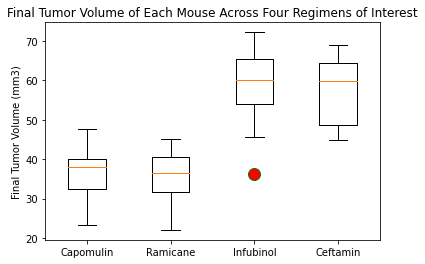

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
measure = [capomulin, ramicane, infubinol, ceftamin]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Each Mouse Across Four Regimens of Interest')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(treatments)
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
ax1.boxplot(measure, flierprops=flierprops)
plt.show()

 # Line and Scatter Plots

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


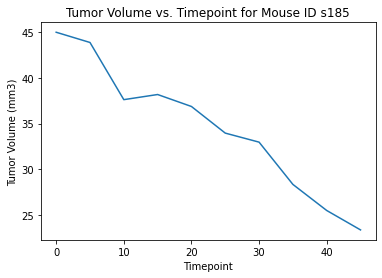

In [21]:
mouse_df = capomulin_df.loc[(capomulin_df["Mouse ID"] == "s185")]
mouse_df

mouse_volume = mouse_df.loc[:, ["Tumor Volume (mm3)"]]
mouse_volume

mouse_timepoint = mouse_df.loc[:, ["Timepoint"]]
mouse_timepoint

plt.title("Tumor Volume vs. Timepoint for Mouse ID s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.plot(mouse_timepoint, mouse_volume)
plt.show()

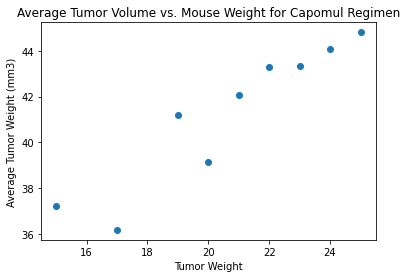

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#weight
tumor_mean = capomulin_df.groupby(["Weight (g)"]).mean()["Tumor Volume (mm3)"]
tumor_mean

tumor_weight = capomulin_df["Weight (g)"].unique()
tumor_weight

plt.scatter(tumor_weight, tumor_mean)
plt.title("Average Tumor Volume vs. Mouse Weight for Capomul Regimen")
plt.xlabel('Tumor Weight')
plt.ylabel('Average Tumor Weight (mm3)')
plt.show()

 # Correlation and Regression

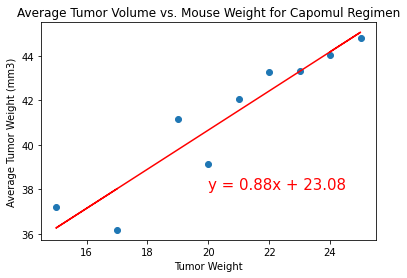

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = tumor_weight
y_values = tumor_mean
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomul Regimen")
plt.xlabel('Tumor Weight')
plt.ylabel('Average Tumor Weight (mm3)')
plt.show()